# Grupowanie państw na podstawie wyglądu ich flag
## Rafał Gulewski, Marek Nowakowski
### Projekt zespołowy - podstawy reprezentacji i analizy danych

Wczytanie niezbędnych pakietów.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.	Przedstawienie informacji o zbiorze danych (opis atrybutów)

In [159]:
#wczytywanie danych
df = pd.read_csv("flag.data",  
                 names =['Name', 'Landmass', 'Zone','Area','Population','Language','Religion','Bars',
                 'Stripes','Colours','Red','Green','Blue','Gold','White','Black','Orange','Mainhue',
                 'Circles','Crosses','Saltires','Quarters','Sunstars','Crescent','Triangle','Icon',
                 'Animate','Text','Topleft','Botright'])

#Słownik kolorów
COLOR_MAP = {"red": 1, "blue": 2, "green": 3, "white": 4, "gold": 5, "black": 6, "orange": 7, "brown": 8}    

#zamiana wartości na wartości liczbowe
df['Mainhue'] = df['Mainhue'].map(COLOR_MAP)
df['Topleft'] = df['Topleft'].map(COLOR_MAP)
df['Botright'] = df['Botright'].map(COLOR_MAP)

#zmiana typu danych w ramce
df.Mainhue = df.Mainhue.apply(int)
df.Topleft = df.Topleft.apply(int)
df.Botright = df.Botright.apply(int)


0      0
1      0
2      0
3      1
4      1
      ..
189    1
190    1
191    0
192    0
193    0
Name: Blue, Length: 194, dtype: int64

In [153]:
#Sprawdzenie braków w danych
df.isnull().sum()

Name          0
Landmass      0
Zone          0
Area          0
Population    0
Language      0
Religion      0
Bars          0
Stripes       0
Colours       0
Red           0
Green         0
Blue          0
Gold          0
White         0
Black         0
Orange        0
Mainhue       0
Circles       0
Crosses       0
Saltires      0
Quarters      0
Sunstars      0
Crescent      0
Triangle      0
Icon          0
Animate       0
Text          0
Topleft       0
Botright      0
dtype: int64

2.	Analiza zbioru ze względu na występowanie danych atrybutów. (ilość wystąpień, średnia itd..)

Text(0.5, 1.0, 'Countries count by religion')

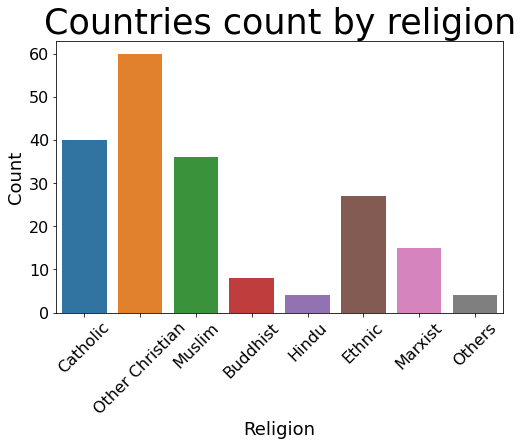

In [156]:
#Wykres kolumnowy ilości państw w danej religii
xticks = list(range(8))
religions = ['Catholic', 'Other Christian', 'Muslim', 'Buddhist', 'Hindu','Ethnic', 'Marxist', 'Others']

plt.figure(figsize = (8, 5))
ax = sns.countplot(df['Religion'])
plt.xlabel('Religion', size = 18)
plt.ylabel('Count', size = 18)
plt.xticks(size = 16)
plt.yticks(size = 16)
ax.set_xticks(xticks)
ax.set_xticklabels(religions, minor=False, rotation = 45)
plt.title('Countries count by religion', size = 35)

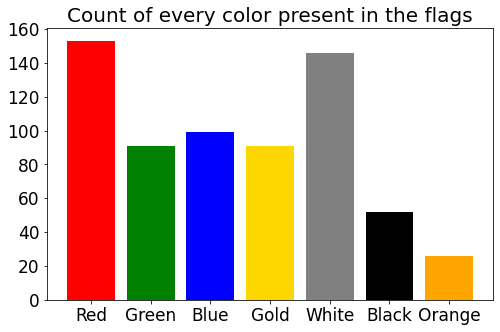

In [161]:
#wykres kolumnowy liczby danego koloru na flagach
color = ['Red', 'Green', 'Blue', 'Gold', 'White', 'Black', 'Orange']
colorGraf = ['Red', 'Green', 'Blue', 'Gold', 'Gray', 'Black', 'Orange']
color_count = []


for col in color:
    color_count.append(sum(df[col] == 1))

plt.figure(figsize = (8, 5))
plt.bar(color, color_count, color = colorGraf)
plt.xticks(size = 17)
plt.yticks(size = 17)
plt.title('Count of every color present in the flags', size = 20)
plt.show()

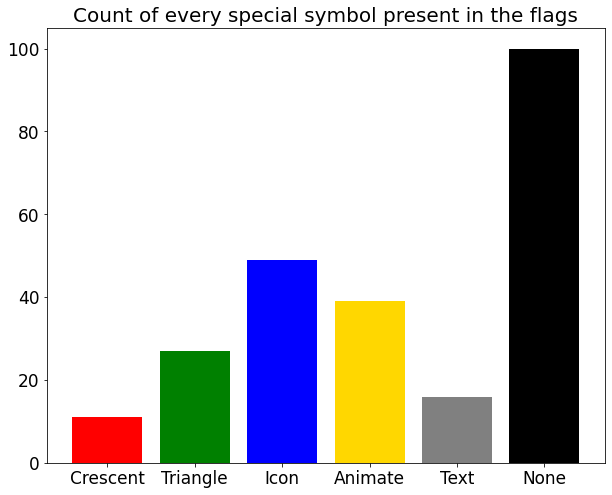

In [162]:
#występowanie specjalnych symboli na flagach
symbols = ['Crescent', 'Triangle', 'Icon', 'Animate', 'Text', 'None']
flagSymbols = df
symbolsCount = pd.DataFrame([[0,0,0,0,0,0]], columns = symbols)

for index, row in flagSymbols.iterrows():
    checker = True
    for symbol in symbols:
        if(symbol != 'None'):
            if(row[symbol] == 1):
                symbolsCount[symbol][0] += 1
                checker = False
        else:
            if(checker):
                symbolsCount[symbol][0] += 1

plt.figure(figsize = (10, 8))
plt.bar(symbols, symbolsCount.loc[0], color = colorGraf)
plt.xticks(size = 17)
plt.yticks(size = 17)
plt.title('Count of every special symbol present in the flags', size = 20)
plt.show()
    

3.	Przedstawienie zależności między atrybutami

4.	Klasyfikacja i dobór atrybutów znaczących.

In [163]:
#Usunięcie zbędnych kolumn (nie związanych z flagami)
flagsDF = df.drop(["Name","Zone","Area","Population","Language","Landmass"], 1)

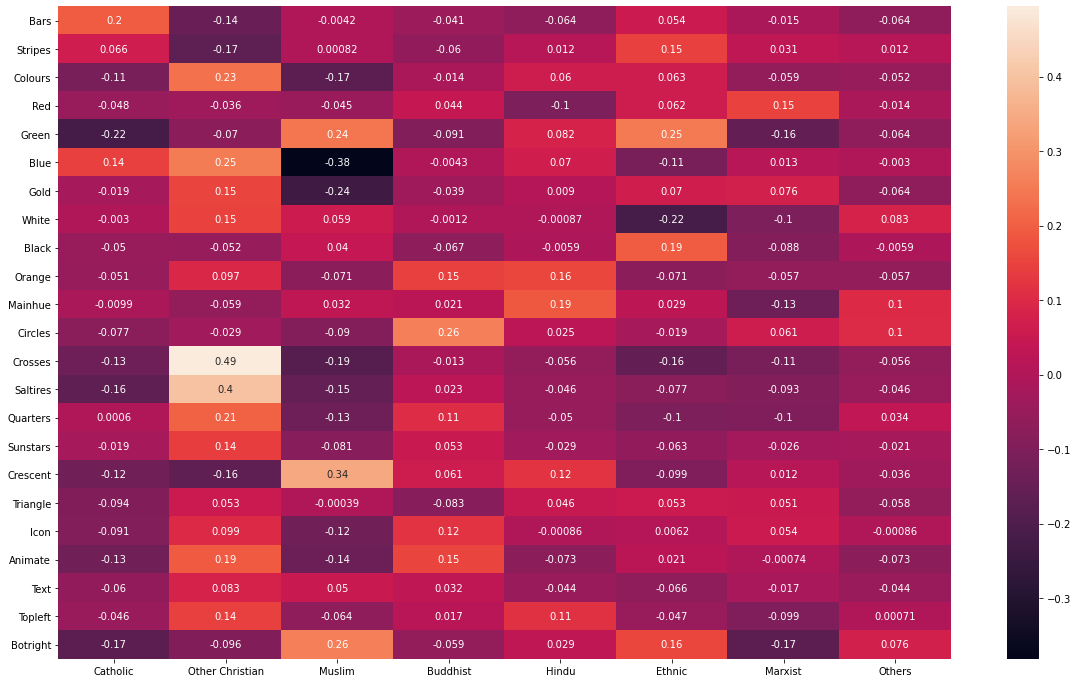

In [164]:
#Korelacja zmięnnych i religii panstw
corr_df = flagsDF
corr_df = corr_df.reset_index()
extra_columns = pd.get_dummies(corr_df["Religion"])
extra_columns = extra_columns.reset_index()
extra_columns = extra_columns.rename(columns ={ 0:"Catholic", 1:"Other Christian", 2:"Muslim", 3:"Buddhist", 4:"Hindu",
               5:"Ethnic", 6:"Marxist", 7:"Others"})
corr_df = pd.merge(corr_df,extra_columns,on="index",how="inner")

corr_df = corr_df.drop(["index", "Religion"], 1)
extra_columns = extra_columns.drop("index", 1)
Var_Corr = corr_df.corr().filter(extra_columns).drop(extra_columns)

fig = plt.figure(figsize=(20,12))
sns.heatmap(Var_Corr, xticklabels = Var_Corr.columns, yticklabels = Var_Corr.index, annot=True)



5.	Porównanie sposobów grupowania i uzyskanych wyników.

In [132]:
# import niezbędnych procedur pakietu scipy i scikit.learn
from scipy.cluster.hierarchy import linkage, dendrogram, ward, fcluster
from scipy.spatial.distance import cdist
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score, accuracy_score, log_loss

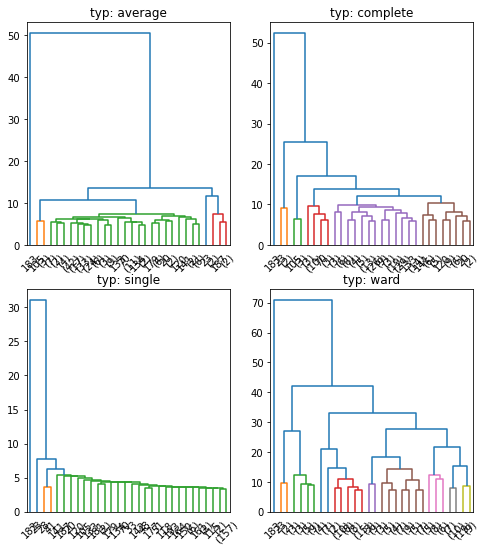

In [187]:
#grupowanie hierarchiczne
flags = flagsDF.drop(['Religion'], 1)
prog_proc = 20

plt.figure(figsize=(8, 9))
#dendrogramy
for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
    grupy = linkage(flags, method = typ_odleglosci, metric = 'euclidean')
    prog = prog_proc*max(grupy[:,2])/100
    plt.subplot(2,2,index + 1)
    cl = dendrogram(grupy, truncate_mode = 'lastp', color_threshold = prog )
    plt.title('typ: ' + typ_odleglosci)


grupa      0  1  2  3  4  5  6  7  8
Religion                            
0         28  0  1  2  1  5  2  0  1
1         37  2  1  8  1  5  3  1  2
2         28  1  0  1  1  2  3  0  0
3          4  0  1  1  0  1  1  0  0
4          1  1  0  0  0  2  0  0  0
5         18  5  0  1  1  0  2  0  0
6         11  0  0  1  0  3  0  0  0
7          2  0  0  0  0  1  1  0  0
grupa      0  1  2  3  4  5  6  7  8
Religion                            
0         28  2  1  2  1  5  1  0  0
1         39  8  1  3  1  5  2  1  0
2         29  1  0  3  1  2  0  0  0
3          4  1  1  1  0  1  0  0  0
4          2  0  0  0  0  2  0  0  0
5         20  1  0  2  1  0  0  0  3
6         11  1  0  0  0  3  0  0  0
7          2  0  0  1  0  1  0  0  0
grupa      0  1  2  3  4  5  6  7  8
Religion                            
0         28  2  1  2  1  5  0  0  1
1         39  8  1  3  1  5  0  1  2
2         29  1  0  3  1  2  0  0  0
3          4  1  1  1  0  1  0  0  0
4          2  0  0  0  0  2  0  0  0
5

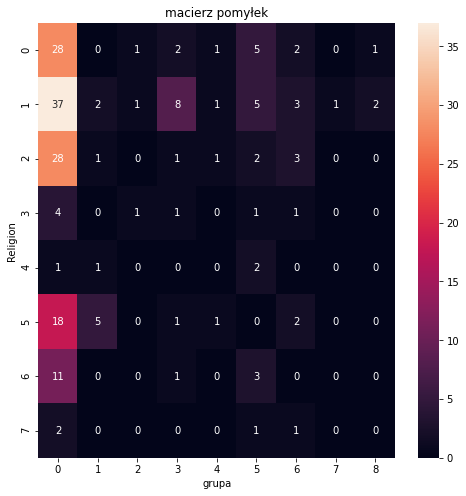

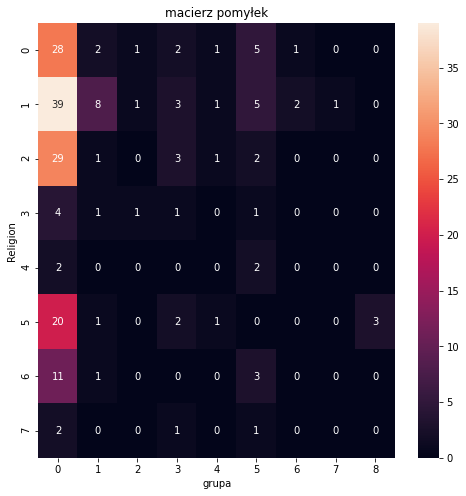

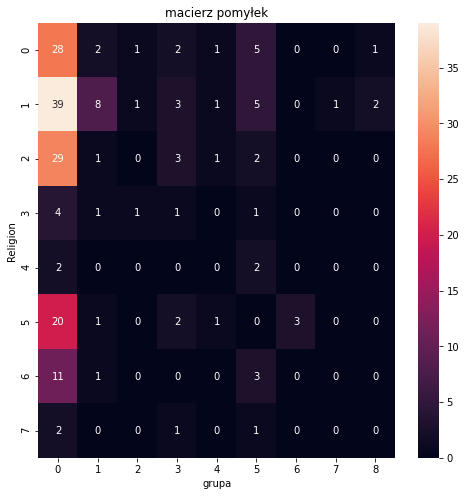

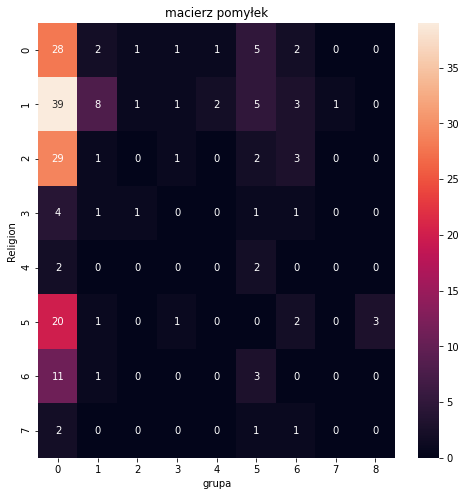

In [179]:
#grupowanie
ile_grup = 9

for index, typ_odleglosci in enumerate(('average', 'complete', 'single', 'ward')):
    model = AgglomerativeClustering(linkage = 'complete', affinity = 'euclidean', n_clusters = ile_grup)
    model.fit(flags)

    klasa = df['Religion'].astype('category').cat.codes
    grupa = model.labels_

    flags['grupa'] = model.labels_

    plt.figure(figsize=(8,8))
    pomylki = pd.crosstab(df['Religion'],flags['grupa'])
    print(pomylki)
    sns.heatmap(pomylki,annot = pomylki)
    plt.title('macierz pomyłek')

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [180]:
#klasyfikatory
classifiers = [
    KNeighborsClassifier(n_neighbors=1),
    NearestCentroid(),
    GaussianNB(),
    DecisionTreeClassifier(),
]

#przygotowanie zbiorów
X = df.drop('Religion', 1)
Y = df.Religion

opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(flags, df['Religion'].astype('category').cat.codes, test_size=0.3)
dane = {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}


In [148]:
# wyswietla wynik weryfikacji klasyfikatora w postaci macierzy pomyłek
def weryfikuj(model,dane):
    model.fit(dane["opis_ucz"], dane["dec_ucz"])

    wynik_ucz = model.predict(dane["opis_ucz"])
    wynik_test = model.predict(dane["opis_test"])

    print("Macierz pomyłek dla zbioru uczącego")
    print(pd.crosstab(dane["dec_ucz"],wynik_ucz)) 
    print('Train score:',model.score(dane["opis_ucz"], dane["dec_ucz"]))
    print("Macierz pomyłek dla zbioru testowego")
    print(pd.crosstab(dane["dec_test"],wynik_test)) 
    print('Test score:',model.score(dane["opis_test"], dane["dec_test"]))

for model in classifiers:
    weryfikuj(model, dane)

Macierz pomyłek dla zbioru uczącego
col_0   0   1   2  3  4   5  6  7
row_0                            
0      29   0   0  0  0   0  0  0
1       0  43   0  0  0   0  0  0
2       1   0  24  0  0   0  0  0
3       1   0   0  5  0   0  0  0
4       0   0   0  0  3   0  0  0
5       0   0   0  0  0  17  0  0
6       1   0   0  0  0   0  7  0
7       0   0   0  0  0   0  0  4
Train score: 0.9777777777777777
Macierz pomyłek dla zbioru testowego
col_0  0  1  2  3  5  6
row_0                  
0      5  2  2  0  1  1
1      5  9  0  1  1  1
2      0  4  7  0  0  0
3      0  2  0  0  0  0
4      0  1  0  0  0  0
5      3  3  1  0  3  0
6      2  2  2  0  1  0
Test score: 0.4067796610169492
Macierz pomyłek dla zbioru uczącego
col_0  0   1   2  3  4  5  6  7
row_0                          
0      4   2   5  2  0  5  7  4
1      3  16   6  3  2  4  0  9
2      0   3  11  0  1  6  1  3
3      0   0   1  3  0  1  0  1
4      0   1   0  0  1  1  0  0
5      0   2   4  0  2  8  0  1
6      1   0   0

6.	Ocena wyników i sformułowanie wniosków.

7.	Wizualne przedstawienie wyników (grupy z ikonami flag danych państw).